In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import geopandas as gpd

In [18]:
data = pd.read_csv('us-states.csv')

In [19]:
data

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
1432,2020-03-28,Virginia,51,740,17
1433,2020-03-28,Washington,53,4311,191
1434,2020-03-28,West Virginia,54,113,0
1435,2020-03-28,Wisconsin,55,1042,17


In [20]:
total_case = data[data['date'] =='2020-03-28'].sort_values('cases')

In [21]:
total_case

,date,state,fips,cases,deaths
1427,2020-03-28,South Dakota,46,68,1
1436,2020-03-28,Wyoming,56,84,0
1420,2020-03-28,North Dakota,38,94,1
1387,2020-03-28,Alaska,2,102,1
1434,2020-03-28,West Virginia,54,113,0
1413,2020-03-28,Nebraska,31,122,2
1412,2020-03-28,Montana,30,147,1
1397,2020-03-28,Hawaii,15,151,0
1417,2020-03-28,New Mexico,35,208,2
1405,2020-03-28,Maine,23,211,1


In [42]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [46]:
total_case['statecode'] = [us_state_abbrev[i] for i in total_case['state']]

In [47]:
total_case

,date,state,fips,cases,deaths,statecode
1427,2020-03-28,South Dakota,46,68,1,SD
1436,2020-03-28,Wyoming,56,84,0,WY
1420,2020-03-28,North Dakota,38,94,1,ND
1387,2020-03-28,Alaska,2,102,1,AK
1434,2020-03-28,West Virginia,54,113,0,WV
1413,2020-03-28,Nebraska,31,122,2,NE
1412,2020-03-28,Montana,30,147,1,MT
1397,2020-03-28,Hawaii,15,151,0,HI
1417,2020-03-28,New Mexico,35,208,2,NM
1405,2020-03-28,Maine,23,211,1,ME


<BarContainer object of 51 artists>

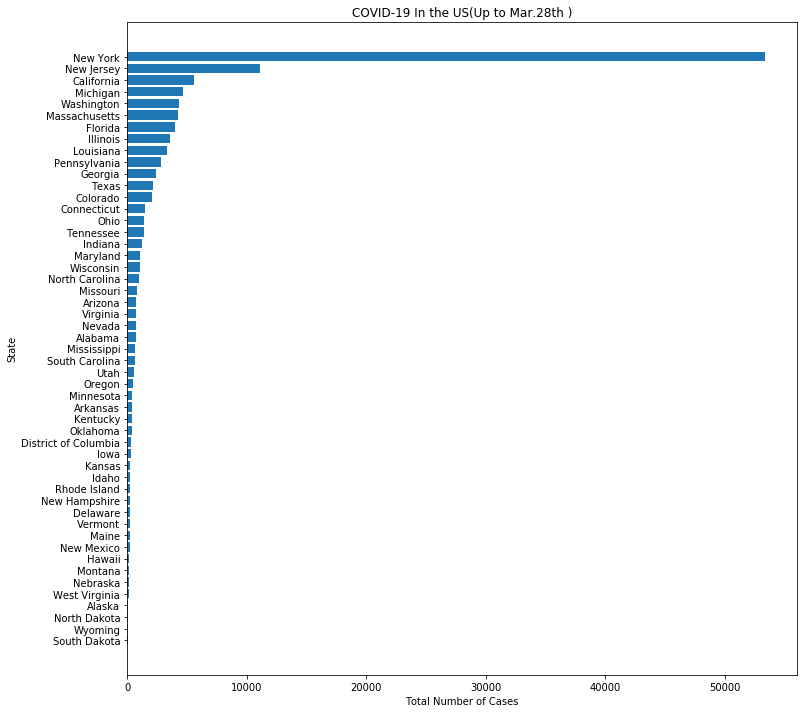

In [7]:
plt.figure(figsize = (12,12))
plt.title('COVID-19 In the US(Up to Mar.28th )')
plt.xlabel('Total Number of Cases')
plt.ylabel('State')
plt.barh(total_case['state'],total_case['cases'])

In [8]:
increase = data.groupby('date').sum().sort_values('cases')

In [9]:
from datetime import datetime
increase['date'] = [datetime.strptime(i,'%Y-%m-%d') for i in increase.index]
increase.index = [i.strftime('%m%d') for i in increase['date']]

Text(0.5, 1.0, 'Daily Total Cases Confirmed/Death in the U.S')

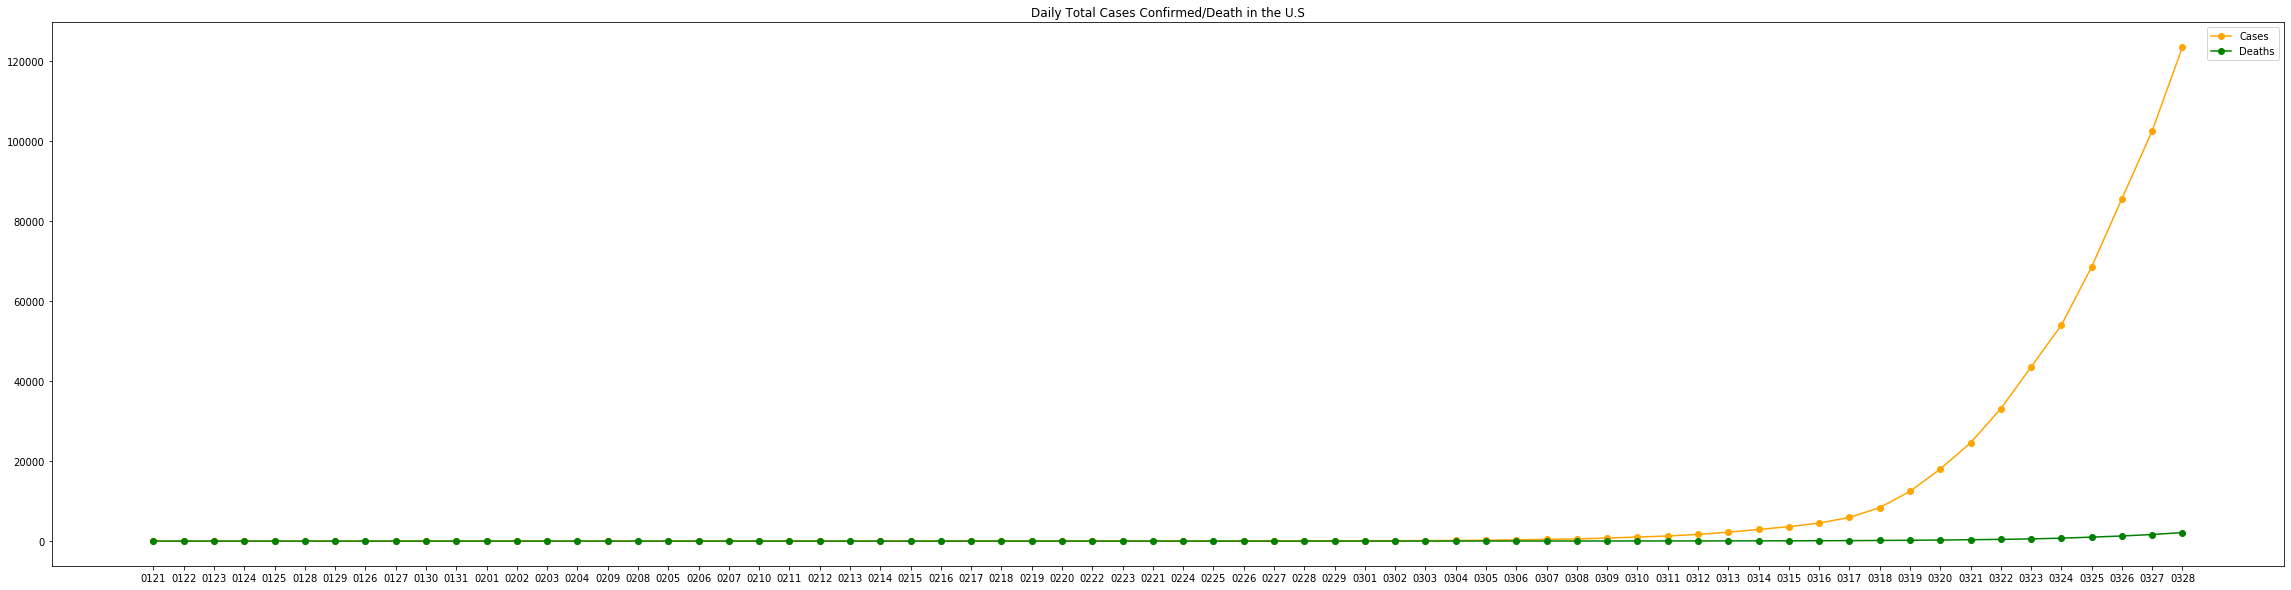

In [10]:
f = plt.figure(figsize = (40,10))
ax = f.add_subplot()

l1, = ax.plot(increase.index,increase['cases'],color = 'orange',marker = 'o',label = 'Cases')
l2, = ax.plot(increase.index,increase['deaths'],color = 'green',marker = 'o',label = 'Cases')

ax.legend(handles=[l1, l2],labels=['Cases', 'Deaths']);
plt.title('Daily Total Cases Confirmed/Death in the U.S')

In [56]:
import chart_studio
chart_studio.tools.set_credentials_file(username='arielli', api_key='rmrzLTwKPcpvhSvN7eKH')

scl = ['rgb(242,240,247)','rgb(218,218,235)','rgb(188,189,220)', 'rgb(158,154,200)', 'rgb(117,107,177)', 'rgb(84,39,143)']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = total_case['statecode'],
        z = total_case['cases'].astype(float),
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Cases throughgout the U.S."
        ),
        #binning_endpoints = [100,500,1000,5000,10000]
    ) ]

layout = dict(
        title = 'COVID-19 US Cases',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )


chart_studio.plotly.plot(fig)

'https://plotly.com/~arielli/23/'